<a href="https://colab.research.google.com/github/GoldKodo/Data/blob/main/13%EC%A3%BC%EC%B0%A8_%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%B2%98%EB%A6%AC_%EC%A2%85%ED%95%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

#한국인의 삶을 파악하라!

In [ ]:
!pip install pyreadstat

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

#### 3. 데이터 불러오기

Koweps_hpwc14_2019_beta2.sav 파일을 본인의 구글 드라이브에 업로드 하고 구글 드라이브를 연결하여 사용하자.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# 데이터 불러오기
raw_welfare = pd.read_spss('/content/drive/MyDrive/DTR/Koweps_hpwc14_2019_beta2.sav')

# 복사본 만들기
welfare = raw_welfare.copy()
welfare.shape  # 행, 열 개수 출력

(14418, 830)

#### 4. 데이터 검토하기

In [5]:
welfare             # 앞부분, 뒷부분 출력

,h14_id,h14_ind,h14_sn,h14_merkey,h_new,h14_cobf,p14_wsc,p14_wsl,p14_wgc,p14_wgl,...,wc14_64,wc14_65,wc14_5aq4,wc14_5aq5,wc14_5aq6,h14_pers_income1,h14_pers_income2,h14_pers_income3,h14_pers_income4,h14_pers_income5
0,2.0,1.0,1.0,20101.0,0.0,NaN,0.291589,0.291589,1307.764781,1307.764781,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
1,3.0,1.0,1.0,30101.0,0.0,NaN,0.419753,0.419753,1882.570960,1882.570960,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
2,4.0,1.0,1.0,40101.0,0.0,NaN,0.265263,0.265980,1189.691668,1192.908537,...,NaN,,NaN,NaN,NaN,NaN,1284.0,NaN,0.0,NaN
3,6.0,1.0,1.0,60101.0,0.0,NaN,0.494906,0.495941,2219.630833,2224.273816,...,1.0,.,2.0,4.0,4.0,2304.0,NaN,1800.0,0.0,NaN
4,6.0,1.0,1.0,60101.0,0.0,NaN,1.017935,1.017935,4565.389177,4565.389177,...,1.0,.,1.0,5.0,2.0,NaN,NaN,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14413,9800.0,7.0,1.0,98000701.0,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
14414,9800.0,7.0,1.0,98000701.0,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
14415,9800.0,7.0,1.0,98000701.0,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,,NaN,NaN,NaN,NaN,208.0,NaN,0.0,NaN
14416,9800.0,7.0,1.0,98000701.0,1.0,NaN,NaN,NaN,NaN,NaN,...,5.0,.,4.0,3.0,3.0,NaN,1200.0,NaN,0.0,NaN


In [6]:
welfare.info()      # 변수 속성 출력

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14418 entries, 0 to 14417
Columns: 830 entries, h14_id to h14_pers_income5
dtypes: float64(826), object(4)
memory usage: 91.3+ MB


In [7]:
welfare.describe()  # 요약 통계량

,h14_id,h14_ind,h14_sn,h14_merkey,h_new,h14_cobf,p14_wsc,p14_wsl,p14_wgc,p14_wgl,...,wc14_63,wc14_64,wc14_5aq4,wc14_5aq5,wc14_5aq6,h14_pers_income1,h14_pers_income2,h14_pers_income3,h14_pers_income4,h14_pers_income5
count,14418.000000,14418.000000,14418.000000,1.441800e+04,14418.000000,121.000000,11513.000000,11513.000000,11513.000000,11513.000000,...,2027.000000,2027.000000,2027.000000,2027.000000,2027.000000,2659.000000,3331.000000,989.000000,14418.000000,715.000000
mean,4672.108406,3.121723,1.004855,4.672140e+07,0.201484,2.256198,1.000000,1.000000,4484.952219,4484.952541,...,3.211643,3.743957,3.513567,4.100641,3.233350,4141.380594,1389.440408,3457.835187,2.038702,1183.292308
std,2792.998128,3.297963,0.143205,2.793014e+07,0.401123,1.675952,0.906021,1.016782,4063.459773,4560.218659,...,2.174768,3.138629,1.045929,0.937712,1.289456,2583.755449,1211.910836,6619.516319,32.965477,2147.418274
min,2.000000,1.000000,1.000000,2.010100e+04,0.000000,1.000000,0.001998,0.000000,8.960093,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-47000.000000,0.000000,-10600.000000
25%,2356.000000,1.000000,1.000000,2.356030e+07,0.000000,1.000000,0.341814,0.269286,1533.021553,1207.736094,...,1.000000,2.000000,3.000000,4.000000,2.000000,2448.000000,391.500000,1000.000000,0.000000,206.000000
50%,4535.000000,1.000000,1.000000,4.535010e+07,0.000000,2.000000,0.726304,0.704045,3257.436901,3157.609630,...,3.000000,3.000000,4.000000,4.000000,3.000000,3540.000000,1116.000000,2498.000000,0.000000,530.000000
75%,6616.000000,7.000000,1.000000,6.616010e+07,0.000000,2.000000,1.366071,1.390045,6126.762919,6234.287538,...,5.000000,5.000000,4.000000,5.000000,4.000000,5378.500000,2040.000000,4687.000000,0.000000,1295.000000
max,9800.000000,14.000000,9.000000,9.800070e+07,1.000000,7.000000,4.727006,5.790039,21200.393903,25968.049029,...,9.000000,99.000000,9.000000,9.000000,9.000000,22700.000000,11500.000000,170000.000000,3000.000000,22644.000000


#### 5. 변수명 바꾸기

In [8]:
welfare = welfare.rename(columns = {'h14_g3'     : 'sex',            #  성별
                                    'h14_g4'     : 'birth',          #  태어난 연도
                                    'h14_g10'    : 'marriage_type',  #  혼인 상태
                                    'h14_g11'    : 'religion',       #  종교
                                    'p1402_8aq1' : 'income',         #  월급
                                    'h14_eco9'   : 'code_job',       #  직업 코드
                                    'h14_reg7'   : 'code_region'})   #  지역 코드

## 분석1 성별에 따른 월급 차이 - 성별에 따라 월급이 다를까?

### 1 성별 변수 검토 및 전처리하기

In [9]:
welfare['sex'].dtypes  # 변수 타입 출력

dtype('float64')

In [10]:
welfare['sex'].value_counts()  # 빈도 구하기

sex
2.0    7913
1.0    6505
Name: count, dtype: int64

In [11]:
# 성별 항목 이름 부여
welfare['sex'] = np.where(welfare['sex'] == 1, 'male', 'female')

# 빈도 구하기
welfare['sex'].value_counts()

sex
female    7913
male      6505
Name: count, dtype: int64

<Axes: xlabel='sex', ylabel='count'>

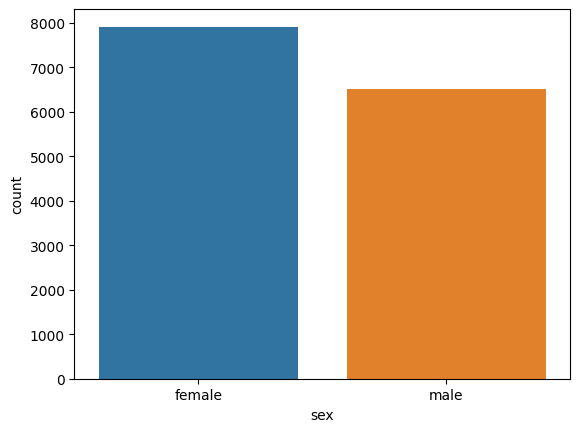

In [12]:
# 빈도 막대 그래프 만들기
sns.countplot(data = welfare, x = 'sex', hue = 'sex')

###2. 월급 변수 검토 및 전처리하기


In [13]:
welfare['income'].dtypes  # 변수 타입 출력

dtype('float64')

<Axes: xlabel='income', ylabel='Count'>

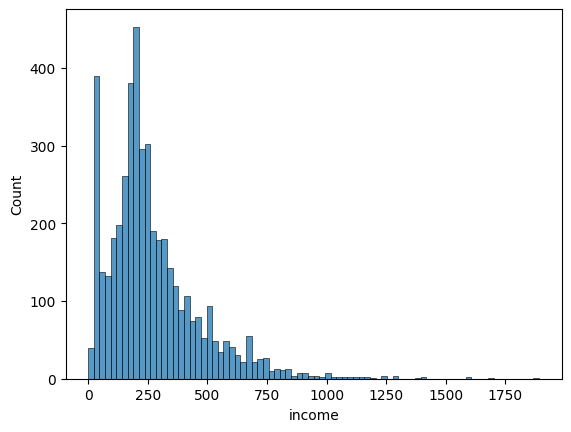

In [14]:
sns.histplot(data = welfare, x = 'income')  # 히스토그램 만들기

In [15]:
welfare['income'].isna().sum()  # 결측치 확인

9884

In [17]:
# # income 결측치 제거 (값이 없는 행 제거)
welfare = welfare.dropna(subset=['income']) # 내가 원하는 열은 'income' 이니까 subset = ['income'] 필요
welfare.shape

(4534, 830)

###3 성별에 따른 월급 차이 분석하기

####성별 월급 평균표 만들기

In [18]:
## 성별 월급 평균표 만들기
# sex별 income 평균 구하기
sex_income = welfare.groupby('sex', as_index = False)['income'].mean() #as_index 의 역할은 female,male 가 index로 가는걸 막아줌. seaborn 에서 그래프 그릴때 편하게
sex_income

,sex,income
0,female,186.293096
1,male,349.037571


####  그래프 만들기

Text(0.5, 1.0, '성별에 따른 월급 차이')

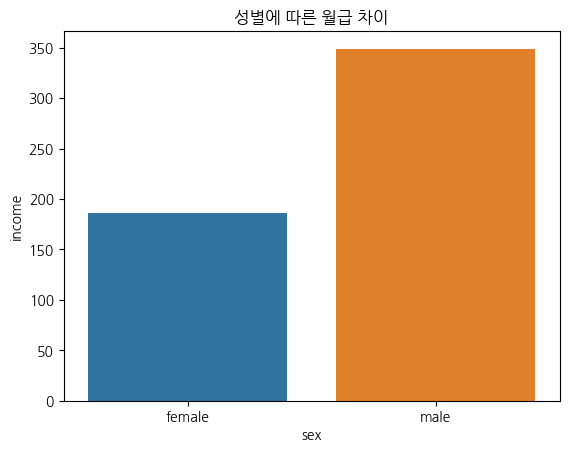

In [19]:
import matplotlib.pyplot as plt
plt.rc("font", family="NanumGothic")
sns.barplot(data = sex_income, x = 'sex', y = 'income', hue='sex')
plt.title('성별에 따른 월급 차이')

## 분석2 나이와 월급의 관계 - 몇 살 때 월급을 가장 많이 받을까?

### 나이 변수 검토 및 전처리하기

In [20]:
welfare['birth'].dtypes  # 변수 타입 출력

dtype('float64')

<Axes: xlabel='birth', ylabel='Count'>

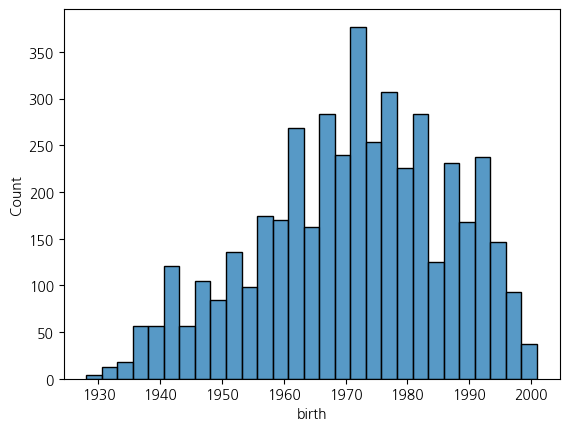

In [21]:
sns.histplot(data = welfare, x = 'birth')  # 히스토그램 만들기

In [22]:
welfare['birth'].isna().sum()  # 결측치 확인

0

In [23]:
# 나이 변수 만들기
welfare['age'] = 2024 - welfare['birth'] + 1
welfare['age'].describe()                                    # 요약 통계량 구하기

count    4534.000000
mean       53.855315
std        15.290056
min        24.000000
25%        43.000000
50%        53.000000
75%        64.000000
max        97.000000
Name: age, dtype: float64

<Axes: xlabel='age', ylabel='Count'>

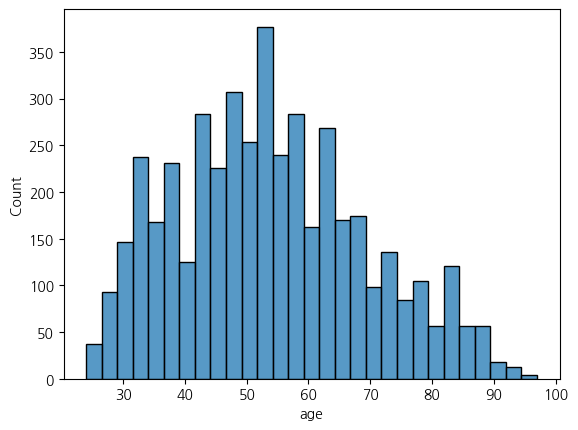

In [24]:
sns.histplot(data = welfare, x = 'age')  # 히스토그램 만들기

###Q. 나이와 월급의 관계 분석하기
## 나이별 월급 평균표 만들기

In [27]:
# age별 분리  income 평균 구하기
age_income = welfare.groupby('age', as_index = False)['income'].mean()
age_income.head()

,age,income
0,24.0,162.000000
1,25.0,121.333333
2,26.0,136.400000
3,27.0,123.666667
4,28.0,179.676471


Q 선그래프 그리기

<Axes: xlabel='age', ylabel='income'>

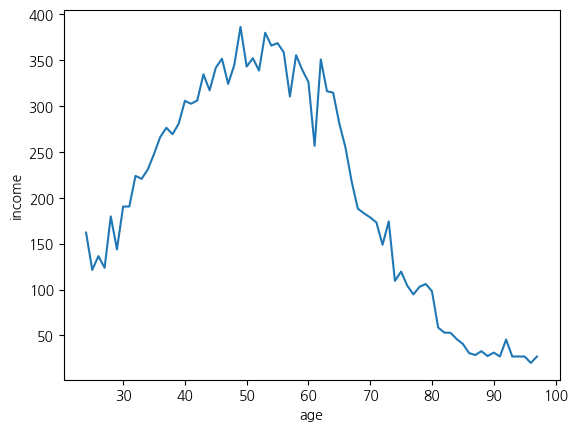

In [29]:
# 선 그래프 만들기
sns.lineplot(data = age_income, x= 'age', y= 'income')

## 분석3 연령대에 따른 월급 차이 - 어떤 연령대의 월급이 가장 많을까?

Q  연령대 변수 만들

In [48]:
# 연령대 변수 만들기 30미만이면 young, 60미만 middle, 아니면 old
welfare['ageg'] = np.where(welfare['age'] < 30, 'young', np.where(welfare['age'] < 60 , 'middle', 'old'))

# 빈도 구하기
welfare['ageg'].value_counts()

ageg
middle    2880
old       1524
young      130
Name: count, dtype: int64

Q 빈도 막대 그래프 만들기

<Axes: xlabel='ageg', ylabel='count'>

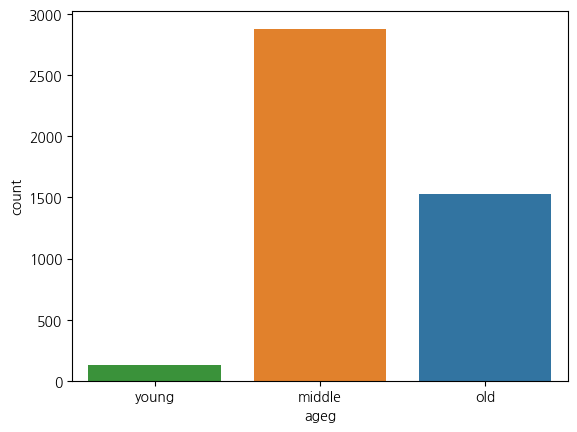

In [50]:
# 연령대별 빈도 막대 그래프 만들기   # order = ['young', 'middle', 'old'] 옵션 추가해보기
sns.countplot(data = welfare, x = 'ageg', hue = 'ageg', order = ['young','middle','old'])

### 분석 4 연령대에 따른 월급 차이 분석하기

Q 연령대별 월급 평균표 만들기

In [56]:
# ageg별  income 평균 구하기

ageg_income = welfare.groupby('ageg',as_index = False)['income'].mean()
ageg_income

,ageg,income
0,middle,315.913542
1,old,189.143045
2,young,146.846154


Q 연령대별 소득 그래프 만들기

Text(0.5, 1.0, '연령대별 월급 차이')

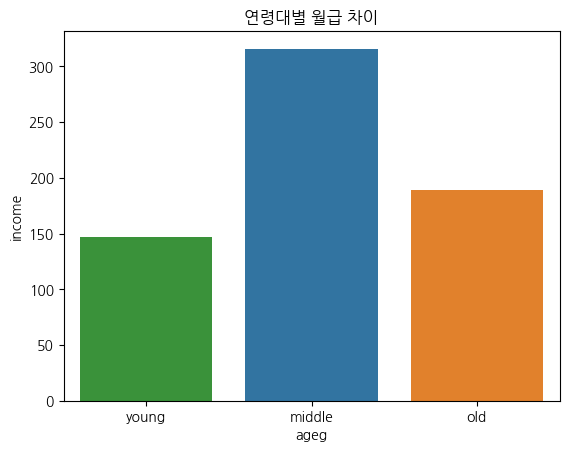

In [57]:
# 막대 그래프 만들기
sns.barplot(data = ageg_income, x = 'ageg', y = 'income', hue = 'ageg', order = ['young','middle','old'])
plt.title('연령대별 월급 차이')

## 분석 4-1 연령대 및 성별 월급 차이 - 성별 월급 차이는 연령대별로 다를까?



Q. 연령대 및 성별 평균표 만들기


In [58]:
# ageg 및 sex별 income 평균 구하기
sex_income = welfare.groupby(['ageg','sex'], as_index = False)['income'].mean()
sex_income

,ageg,sex,income
0,middle,female,234.307458
1,middle,male,384.387612
2,old,female,115.410843
3,old,male,277.324207
4,young,female,144.128713
5,young,male,156.310345


#### 2. 그래프 만들기

Text(0.5, 1.0, '남녀별 연령대 급여')

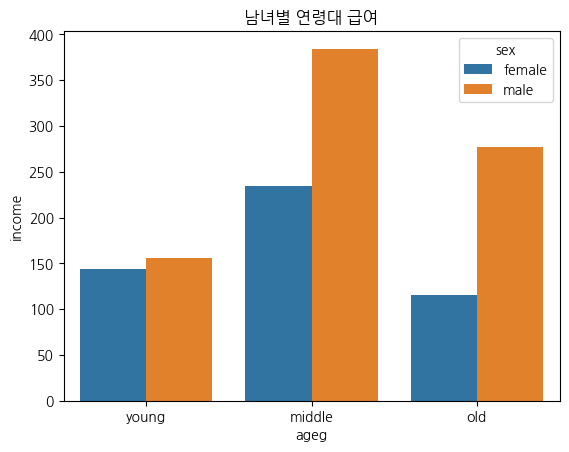

In [59]:
# 막대 그래프 만들기
sns.barplot(data = sex_income, x= 'ageg', y = 'income', hue= 'sex', order = ['young','middle','old'])
plt.title('남녀별 연령대 급여')

##분석 4-2 나이 및 성별 월급 차이 분석하기

Q 나이 및 성별 월급 평균표 만들기

In [60]:
# age 및 sex별 분리
# income 평균 구하기
sex_age = welfare.groupby(['age','sex'], as_index =False)['income'].mean()
sex_age.head()

,age,sex,income
0,24.0,male,162.000000
1,25.0,female,87.666667
2,25.0,male,155.000000
3,26.0,female,124.000000
4,26.0,male,186.000000


# 나이별 월급 선 그래프 만들기

<Axes: xlabel='age', ylabel='income'>

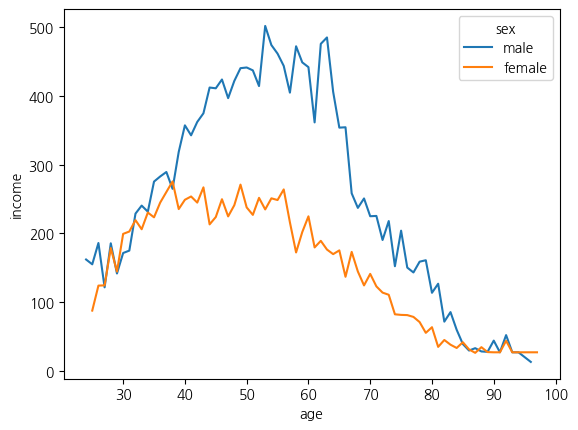

In [61]:
# 선 그래프 만들기
sns.lineplot(data = sex_age, x= 'age', y = 'income', hue = 'sex')

## 분석 5 직업별 월급 차이 - 어떤 직업이 월급을 가장 많이 받을까?



In [62]:
welfare['code_job'].dtypes  # 변수 타입 출력

dtype('float64')

In [63]:
welfare['code_job'].value_counts()  # 빈도 구하기

code_job
941.0    353
312.0    267
313.0    201
930.0    197
521.0    166
        ... 
819.0      1
861.0      1
882.0      1
630.0      1
872.0      1
Name: count, Length: 147, dtype: int64

#### 직종코드 불러오기

In [64]:
list_job = pd.read_excel('/content/drive/MyDrive/DTR/Koweps_Codebook_2019.xlsx', sheet_name = '직종코드')
list_job.head()

,code_job,job
0,111,의회 의원∙고위 공무원 및 공공단체 임원
1,112,기업 고위 임원
2,121,행정 및 경영 지원 관리자
3,122,마케팅 및 광고∙홍보 관리자
4,131,연구∙교육 및 법률 관련 관리자


In [65]:
list_job.shape  # 행, 열 개수 출력

(156, 2)

In [69]:
# welfare에 list_job을 code_job을 기준으로 결합하기
welfare = welfare.merge(list_job, how = 'left', on = 'code_job')

In [67]:
welfare['code_job'].isna().sum()  # 결측치 확인

0

### 직업별 월급 차이 분석하기

Q 직업별 월급 평균표 만들기

In [74]:
# job, income 결측치 제거
welfare = welfare.dropna(subset=['income','job'])
welfare.shape
# job별 ,  income 평균 구하기
job_income = welfare.groupby('job', as_index = False)['income'].mean()
job_income.head()

,job,income
0,가사 및 육아 도우미,92.455882
1,간호사,265.219178
2,감정∙기술영업및중개관련종사자,391.000000
3,건물 관리원 및 검표원,168.375000
4,건설 및 광업 단순 종사자,261.975000


#### 3. 그래프 만들기

**Q (1) 월급이 많은 직업**

In [76]:
# 월급 상위 10위 추출
top10 = job_income.sort_values('income', ascending= False).head(10)
top10

,job,income
98,의료 진료 전문가,781.000000
60,법률 전문가,776.333333
140,행정 및 경영 지원 관리자,771.833333
63,보험 및 금융 관리자,734.750000
110,재활용 처리 및 소각로 조작원,688.000000
131,컴퓨터 하드웨어 및 통신공학 전문가,679.444444
24,기계∙로봇공학 기술자 및 시험원,669.166667
6,건설∙전기 및 생산 관련 관리자,603.083333
120,제관원 및 판금원,597.000000
100,의회 의원∙고위 공무원 및 공공단체 임원,580.500000


<Axes: xlabel='income', ylabel='job'>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 8729 (\N{BULLET OPERATOR}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8729 (\N{BULLET OPERATOR}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


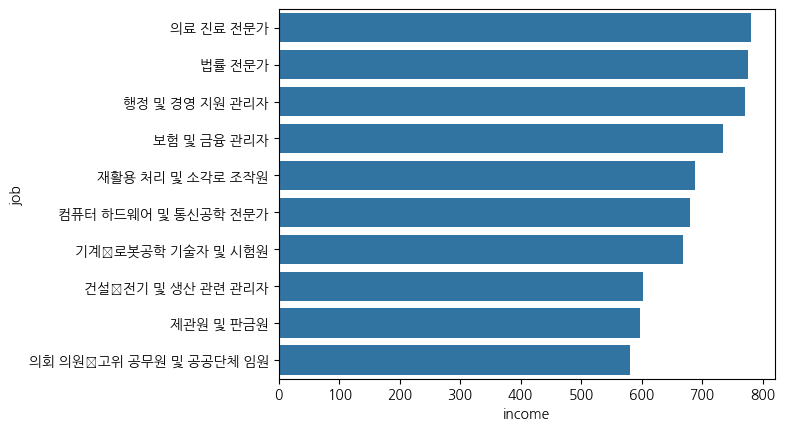

In [77]:
# 막대 그래프 만들기
sns.barplot(data = top10, y = 'job', x = 'income')

**(2) 월급이 적은 직업**

In [78]:
# 하위 10위 추출
bottom10 = job_income.sort_values('income').head(10)
bottom10

,job,income
33,기타 돌봄∙보건 및 개인 생활 서비스 종사자,73.964286
34,기타 서비스 관련 단순 종사자,77.789474
128,청소원 및 환경미화원,88.461756
0,가사 및 육아 도우미,92.455882
43,돌봄 및 보건 서비스 종사자,117.162338
97,음식 관련 단순 종사자,118.187500
39,농림∙어업 관련 단순 종사자,122.625000
139,학예사∙사서 및 기록물 관리사,140.000000
126,채굴 및 토목 관련 기능 종사자,140.000000
135,판매 관련 단순 종사자,140.909091


[(0.0, 800.0)]

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 8729 (\N{BULLET OPERATOR}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8729 (\N{BULLET OPERATOR}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


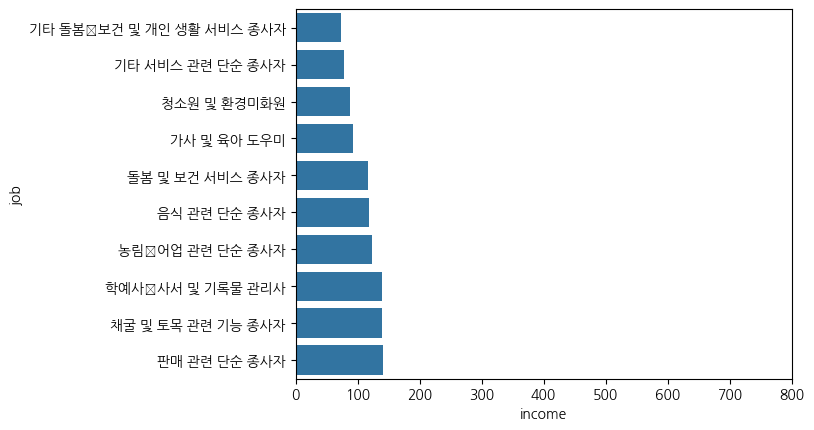

In [80]:
# 막대 그래프 만들기
sns.barplot(data = bottom10, y = 'job', x = 'income').set(xlim = [0, 800])

## 분석 6 성별 직업 빈도 - 성별에 따라 어떤 직업이 가장 많을까?

#### 1. 성별 직업 빈도표 만들기

In [86]:
## 남성 직업 빈도 상위 10개 추출
# #query = 조건을 문자열로 지정, 데이터프레임에서 원하는 조건에 맞는 행 추출(여기선 'male' 추출)
# #job 별 income 구하고
# 빈도 구한다음
# income 이름을 n으로 바꾸고
# 내림차순 정렬
# 상위 10행 추출
job_male = welfare.query('sex == "male"')\
                .groupby('job', as_index=False)['income']\
                .count()\
                .rename(columns={'income': 'n'})\
                .sort_values('n', ascending=False)\
                .head(10)
job_male

,job,n
11,경영 관련 사무원,212
102,자동차 운전원,114
125,청소원 및 환경미화원,92
88,영업 종사자,91
3,건물 관리원 및 검표원,78
137,행정 사무원,74
118,제조 관련 단순 종사자,69
46,매장 판매 종사자,60
112,전기∙전자기기 설치 및 수리원,52
58,배달원,52


In [88]:
## 여성 직업 빈도 상위 10개 추출

#query = 조건을 문자열로 지정, 데이터프레임에서 원하는 조건에 맞는 행 추출(여기선 'female' 추출)
# job별 분리
# job 빈도 구하기
# 내림차순 정렬
# 상위 10행 추출
job_female = welfare.query('sex == "female"') \
                    .groupby('job', as_index = False) \
                    .agg(n = ('job', 'count')) \
                    .sort_values('n', ascending = False) \
                    .head(10)
job_female

,job,n
78,청소원 및 환경미화원,261
92,회계 및 경리 사무원,151
26,돌봄 및 보건 서비스 종사자,151
75,제조 관련 단순 종사자,128
28,매장 판매 종사자,106
64,음식 관련 단순 종사자,101
21,기타 서비스 관련 단순 종사자,83
10,고객 상담 및 기타 사무원,74
76,조리사,72
1,간호사,70


#### 2. 그래프 만들기

[(0.0, 500.0)]

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 8729 (\N{BULLET OPERATOR}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8729 (\N{BULLET OPERATOR}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


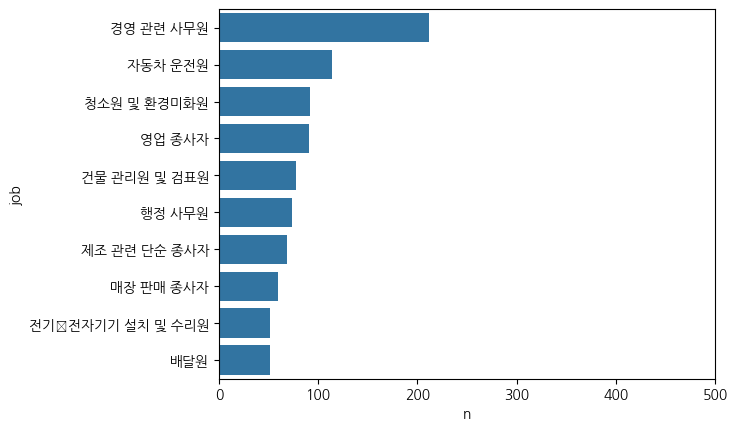

In [89]:
# 남성 직업 빈도 막대 그래프 만들기
sns.barplot(data = job_male, y = 'job', x = 'n').set(xlim = [0, 500])

[(0.0, 500.0)]

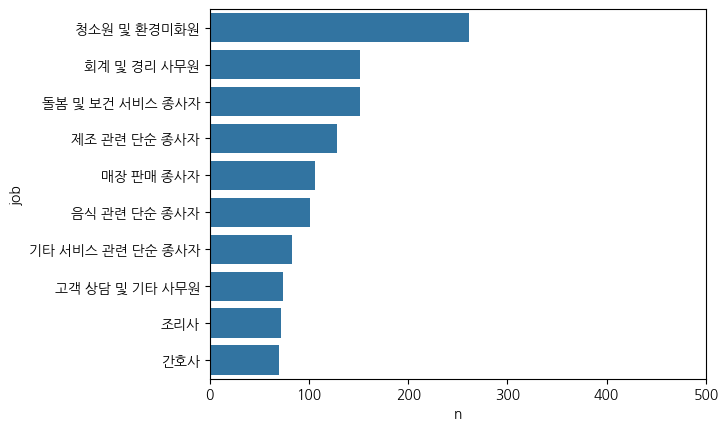

In [90]:
# 여성 직업 빈도 막대 그래프 만들기
sns.barplot(data = job_female, y = 'job', x = 'n').set(xlim = [0, 500])

## 분석 7 종교 유무에 따른 이혼율 - 종교가 있으면 이혼을 덜 할까?

### 종교 변수 검토 및 전처리하기


In [91]:
welfare['religion'].value_counts()  # 빈도 구하기

religion
2.0    2514
1.0    2020
Name: count, dtype: int64

In [93]:
# 종교 유무 이름 부여 1: yes, 2 : no
welfare['religion'] = np.where(welfare['religion'] ==1 , 'yes', 'no')
welfare['religion'].value_counts()

religion
no     2514
yes    2020
Name: count, dtype: int64

<Axes: xlabel='religion', ylabel='count'>

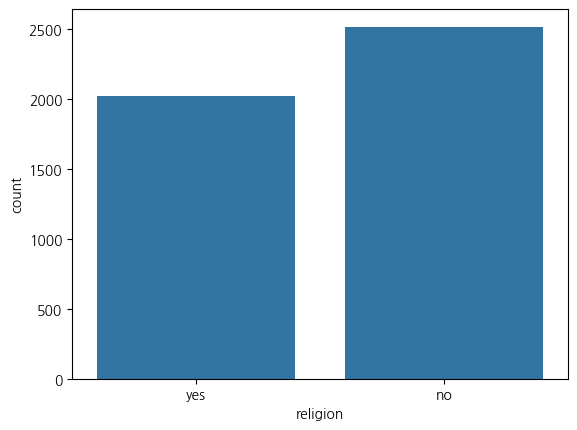

In [96]:
# 막대 그래프 만들기
sns.countplot(data = welfare, x= 'religion')

### 혼인 상태 변수 검토 및 전처리하기

#### 1. 변수 검토하기

In [97]:
welfare['marriage_type'].dtypes  # 변수 타입 출력

dtype('float64')

In [98]:
welfare['marriage_type'].value_counts()  # 빈도 구하기

marriage_type
1.0    2830
5.0    1088
2.0     315
3.0     268
4.0      32
0.0       1
Name: count, dtype: int64

#### 2. 파생변수 만들기 - 이혼 여부

In [99]:
# 이혼 여부 변수 만들기
welfare['marriage'] = np.where(welfare['marriage_type'] == 1, 'marriage',
                      np.where(welfare['marriage_type'] == 3, 'divorce', 'etc'))

In [100]:
## 이혼 여부별 빈도

# marriage별 분리
# marriage별 빈도 구하기
# agg = 함수 다중적용 가능인데, n = marrige를 count 한 수치 라는 뜻임.
n_divorce = welfare.groupby('marriage', as_index = False) \
                   .agg(n = ('marriage', 'count'))
n_divorce

,marriage,n
0,divorce,268
1,etc,1436
2,marriage,2830


<Axes: xlabel='marriage', ylabel='n'>

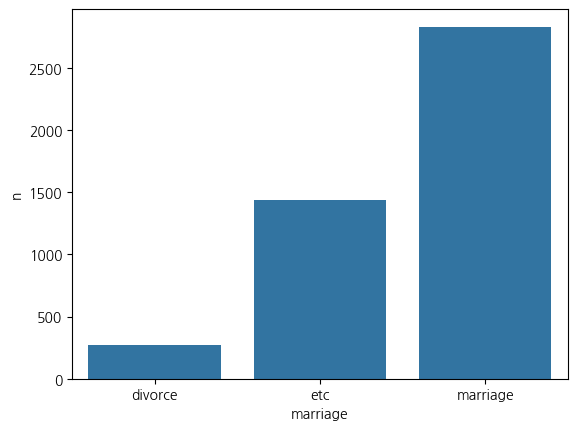

In [101]:
# 막대 그래프 만들기
sns.barplot(data = n_divorce, x = 'marriage', y = 'n')

종교 유무에 따른 이혼율 표 만들기
'religion' 열을 기준으로 그룹화한 후, 각 그룹 내에서 'marriage' 열의 값 비율을 계산 normalize=True는 각 값의 비율을 계산하는 데 사용됩니다.

In [102]:
# etc 제외
# religion별 분리,marriage 추출
# 비율 구하기 (Nprmalize =True가 있으면 퍼센테이지를 볼 수 있음)
rel_div = welfare.query('marriage != "etc"') \
                 .groupby('religion', as_index = False)['marriage'] \
                 .value_counts(normalize = True)
rel_div

,religion,marriage,proportion
0,no,marriage,0.905075
1,no,divorce,0.094925
2,yes,marriage,0.923401
3,yes,divorce,0.076599


#### 2. 그래프 만들기

In [103]:
# divorce 추출
# 백분율로 바꾸기
# 반올림
#rel_div = rel_div.query('marriage == "divorce"') \
#                 .assign(proportion = rel_div['proportion'] * 100) \ #assign은 새 열을 추가하거나 수정할때 사용됨.
#                 .round(1)
rel_div = rel_div.query('marriage == "divorce"')
rel_div['proportion'] = round(rel_div['proportion']* 100,1)

rel_div

<ipython-input-103-a0ea2dda445d>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rel_div['proportion'] = round(rel_div['proportion']* 100,1)


,religion,marriage,proportion
1,no,divorce,9.5
3,yes,divorce,7.7


<Axes: xlabel='religion', ylabel='proportion'>

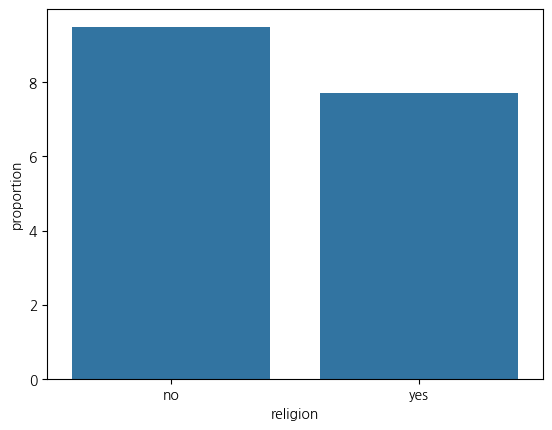

In [104]:
# 막대 그래프 만들기
sns.barplot(data = rel_div, x = 'religion', y = 'proportion')

## Q 분석 8 지역별 연령대 비율 - 어느 지역에 노년층이 많을까?



In [105]:
# 지역 코드 목록 만들기
list_region = pd.DataFrame({'code_region' : [1, 2, 3, 4, 5, 6, 7],
                            'region'      : ['서울',
                                             '수도권(인천/경기)',
                                             '부산/경남/울산',
                                             '대구/경북',
                                             '대전/충남',
                                             '강원/충북',
                                             '광주/전남/전북/제주도']})
list_region

,code_region,region
0,1,서울
1,2,수도권(인천/경기)
2,3,부산/경남/울산
3,4,대구/경북
4,5,대전/충남
5,6,강원/충북
6,7,광주/전남/전북/제주도


In [106]:
welfare = raw_welfare.copy()
welfare = welfare.rename(columns = {'h14_g3'     : 'sex',            #  성별
                                    'h14_g4'     : 'birth',          #  태어난 연도
                                    'h14_g10'    : 'marriage_type',  #  혼인 상태
                                    'h14_g11'    : 'religion',       #  종교
                                    'p1402_8aq1' : 'income',         #  월급
                                    'h14_eco9'   : 'code_job',       #  직업 코드
                                    'h14_reg7'   : 'code_region'})   #  지역 코드
welfare['sex'] = np.where(welfare['sex'] == 1, 'male', 'female')
welfare['age'] = 2024 - welfare['birth'] + 1

welfare['ageg'] = np.where(welfare['age'] < 30, 'young',
                          np.where(welfare['age'] < 60, 'middle', 'old'))

In [169]:
region_age = welfare.groupby('region', as_index = False)['ageg'].value_counts(normalize=True)
region_age.head(5)

,region,ageg,proportion
0,강원/충북,old,0.517150
3,광주/전남/전북/제주도,old,0.504461
6,대구/경북,old,0.566551
9,대전/충남,old,0.465852
12,부산/경남/울산,old,0.504902


In [176]:
melfare = pd.merge(region_age, list_region, how='right', on='region')
melfare = melfare.drop(columns = ['code_region'])
melfare.sort_values('proportion', ascending=False)

,region,ageg,proportion
9,대구/경북,old,0.566551
15,강원/충북,old,0.517150
6,부산/경남/울산,old,0.504902
18,광주/전남/전북/제주도,old,0.504461
12,대전/충남,old,0.465852
0,서울,old,0.448052
3,수도권(인천/경기),old,0.390943
1,서울,middle,0.377622
4,수도권(인천/경기),middle,0.376155
13,대전/충남,middle,0.327822


In [177]:
melfare['percent1'] = round(melfare['proportion']* 100,1)
melfare.sort_values('percent1', ascending=False)
melfare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   region      21 non-null     object 
 1   ageg        21 non-null     object 
 2   proportion  21 non-null     float64
 3   percent1    21 non-null     float64
dtypes: float64(2), object(2)
memory usage: 800.0+ bytes


<Axes: xlabel='percent1', ylabel='region'>

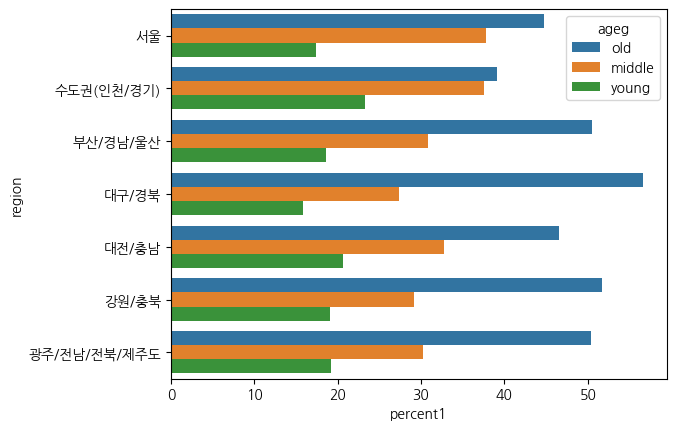

In [178]:
sns.barplot(data = melfare, y = 'region', x = 'percent1',hue = 'ageg')